In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import os
import matplotlib.pyplot as plt
from keras.layers import Dropout
from google.colab import drive
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# set input and output path
input_dir = '/content/drive/MyDrive/1_day'
output_file = 'predicted_prices_1day_back30.xlsx'
output_dir = '/content/drive/MyDrive/results'

In [3]:
def create_dataset(dataset, time_step):      
    x_data, y_data = [], []
    for i in range(len(dataset) - time_step):
        a = dataset[i:(i + time_step), 0]
        x_data.append(a)
        b = dataset[(i + time_step), 0]       
        y_data.append(b)
    return np.array(x_data), np.array(y_data)

In [5]:
def create_model(batch_size=32, time_steps=1, num_layers=1, num_nodes=128,dropout=0):
    model = Sequential()
    if num_layers == 1:
        model.add(LSTM(num_nodes, input_shape=(time_steps, 1)))
        model.add(Dropout(dropout))
    else:
        model.add(LSTM(num_nodes, input_shape=(time_steps, 1), return_sequences=True))
        model.add(Dropout(dropout))
        for i in range(num_layers-2):
            model.add(LSTM(num_nodes, return_sequences=True))
            model.add(Dropout(dropout))
        model.add(LSTM(num_nodes))
        model.add(Dropout(dropout))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [23]:
# hyperparameters
# Due to the limitation of time and computing power, we can't set too much values

batch_size = [64, 128]
time_steps = [30] # 40,60; This parameter will be manually adjusted.
num_layers = [1, 2]
num_nodes = [32, 64]
epochs = [50, 100]
dropout = [0, 0.1]

Processing file: TCL中环.xlsx
TRAIN长度： 212
TEST长度： 89
XTRAIN长度： 182 YTRAIN长度： 182
XTEST长度： 59 YTEST长度： 59


<ipython-input-24-253513799d93>:59: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: -0.006181 using {'batch_size': 64, 'dropout': 0, 'epochs': 100, 'num_layers': 1, 'num_nodes': 64, 'time_steps': 30}
2/2 [==============================] - 0s 14ms/step
Train RMSE: 7.541196264614049
Test RMSE: 5.457940986003832


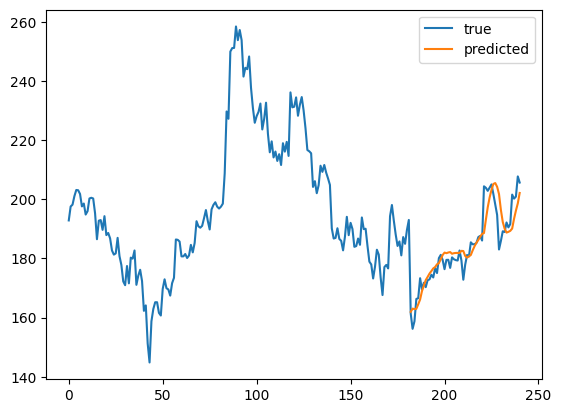

stock_results:      stock name：  Actual price  Predicted price    open       date  Test RMSE
3820  TCL中环.xlsx        161.39       161.947647  159.48 2023-01-03   5.457941
3821  TCL中环.xlsx        156.21       163.044952  161.39 2023-01-04   5.457941
3822  TCL中环.xlsx        158.76       162.878510  156.17 2023-01-05   5.457941
3823  TCL中环.xlsx        166.31       162.969254  159.14 2023-01-06   5.457941
3824  TCL中环.xlsx        166.57       164.506851  166.40 2023-01-09   5.457941
3825  TCL中环.xlsx        173.32       166.125717  175.56 2023-01-10   5.457941
3826  TCL中环.xlsx        169.50       168.981567  172.51 2023-01-11   5.457941
3827  TCL中环.xlsx        171.79       170.825500  171.15 2023-01-12   5.457941
3828  TCL中环.xlsx        170.30       172.668304  171.49 2023-01-13   5.457941
3829  TCL中环.xlsx        172.64       173.746796  169.33 2023-01-16   5.457941
3830  TCL中环.xlsx        172.93       174.874329  172.59 2023-01-17   5.457941
3831  TCL中环.xlsx        174.50       175.729614  

<ipython-input-24-253513799d93>:59: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Best: -0.006783 using {'batch_size': 64, 'dropout': 0.1, 'epochs': 100, 'num_layers': 2, 'num_nodes': 64, 'time_steps': 30}
2/2 [==============================] - 0s 13ms/step
Train RMSE: 2.2049288163141685
Test RMSE: 1.4559019343422543


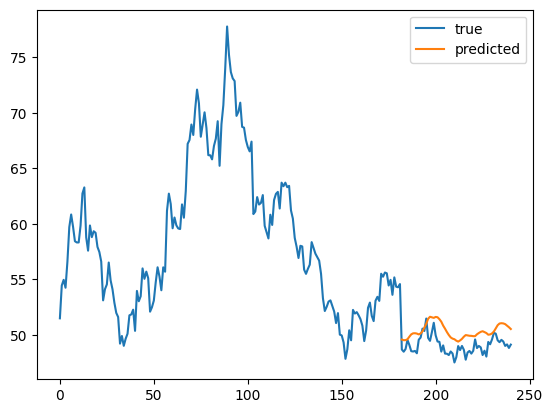

stock_results:     stock name：  Actual price  Predicted price   open       date  Test RMSE
352   大全能源.xlsx         48.67        49.563663  48.17 2023-01-03   1.455902
353   大全能源.xlsx         48.47        49.509346  48.66 2023-01-04   1.455902
354   大全能源.xlsx         48.72        49.514282  48.47 2023-01-05   1.455902
355   大全能源.xlsx         49.53        49.593433  48.70 2023-01-06   1.455902
356   大全能源.xlsx         49.08        49.821239  49.83 2023-01-09   1.455902
357   大全能源.xlsx         48.52        50.034138  48.68 2023-01-10   1.455902
358   大全能源.xlsx         48.49        50.127811  49.05 2023-01-11   1.455902
359   大全能源.xlsx         48.54        50.137356  48.50 2023-01-12   1.455902
360   大全能源.xlsx         48.33        50.106544  48.53 2023-01-13   1.455902
361   大全能源.xlsx         49.55        50.029591  48.47 2023-01-16   1.455902
362   大全能源.xlsx         49.75        50.115398  50.00 2023-01-17   1.455902
363   大全能源.xlsx         50.55        50.308617  50.38 2023-01-18   1.4559

<ipython-input-24-253513799d93>:59: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: -0.007261 using {'batch_size': 64, 'dropout': 0, 'epochs': 100, 'num_layers': 1, 'num_nodes': 32, 'time_steps': 30}
2/2 [==============================] - 0s 10ms/step
Train RMSE: 38.13087529612356
Test RMSE: 60.313742485994794


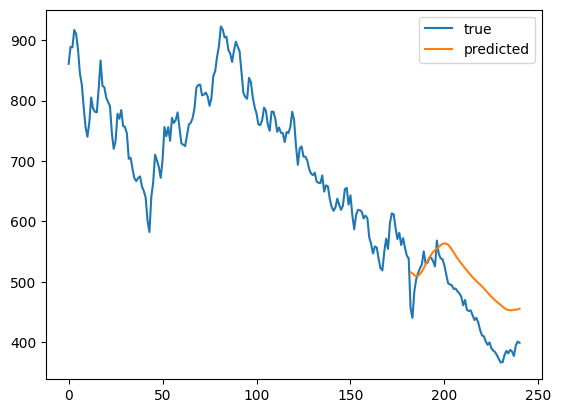

stock_results:      stock name：  Actual price  Predicted price    open       date  Test RMSE
1530   恩捷股份.xlsx        456.29       515.706604  459.13 2023-01-03  60.313742
1531   恩捷股份.xlsx        440.20       513.818665  453.55 2023-01-04  60.313742
1532   恩捷股份.xlsx        484.22       510.962982  442.27 2023-01-05  60.313742
1533   恩捷股份.xlsx        504.34       509.221466  484.19 2023-01-06  60.313742
1534   恩捷股份.xlsx        514.71       509.920715  506.76 2023-01-09  60.313742
1535   恩捷股份.xlsx        522.21       512.724854  510.65 2023-01-10  60.313742
1536   恩捷股份.xlsx        528.52       517.025696  524.91 2023-01-11  60.313742
1537   恩捷股份.xlsx        550.32       522.248779  535.11 2023-01-12  60.313742
1538   恩捷股份.xlsx        530.31       528.788208  566.97 2023-01-13  60.313742
1539   恩捷股份.xlsx        531.32       534.942688  530.31 2023-01-16  60.313742
1540   恩捷股份.xlsx        539.74       540.183044  530.97 2023-01-17  60.313742
1541   恩捷股份.xlsx        539.74       544.938599  

<ipython-input-24-253513799d93>:59: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: -0.007512 using {'batch_size': 64, 'dropout': 0, 'epochs': 100, 'num_layers': 1, 'num_nodes': 64, 'time_steps': 30}
2/2 [==============================] - 0s 11ms/step
Train RMSE: 12.42817024386964
Test RMSE: 8.093861847289354


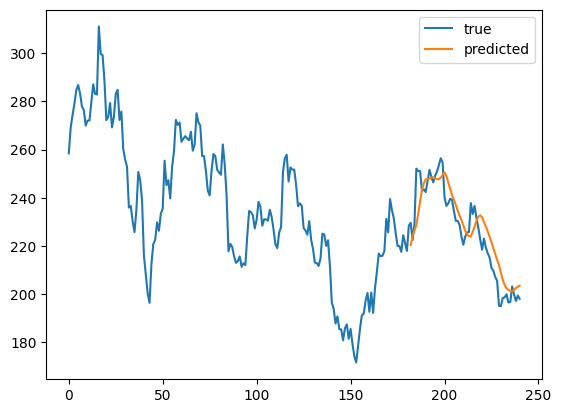

stock_results:      stock name：  Actual price  Predicted price    open       date  Test RMSE
2025    福斯特.xlsx        229.61       220.288834  223.78 2023-01-03   8.093862
2026    福斯特.xlsx        222.44       224.093384  227.83 2023-01-04   8.093862
2027    福斯特.xlsx        229.18       226.386597  223.78 2023-01-05   8.093862
2028    福斯特.xlsx        252.09       228.592545  235.92 2023-01-06   8.093862
2029    福斯特.xlsx        251.08       233.406891  246.03 2023-01-09   8.093862
2030    福斯特.xlsx        251.08       238.475464  252.57 2023-01-10   8.093862
2031    福斯特.xlsx        242.79       243.273926  249.94 2023-01-11   8.093862
2032    福斯特.xlsx        243.53       246.046387  242.79 2023-01-12   8.093862
2033    福斯特.xlsx        242.35       247.583923  246.03 2023-01-13   8.093862
2034    福斯特.xlsx        246.97       247.825653  240.63 2023-01-16   8.093862
2035    福斯特.xlsx        251.59       247.947021  246.97 2023-01-17   8.093862
2036    福斯特.xlsx        248.69       248.447540  

<ipython-input-24-253513799d93>:59: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: -0.006484 using {'batch_size': 64, 'dropout': 0, 'epochs': 100, 'num_layers': 1, 'num_nodes': 64, 'time_steps': 30}
2/2 [==============================] - 0s 14ms/step
Train RMSE: 51.327475774917886
Test RMSE: 45.395976948848656


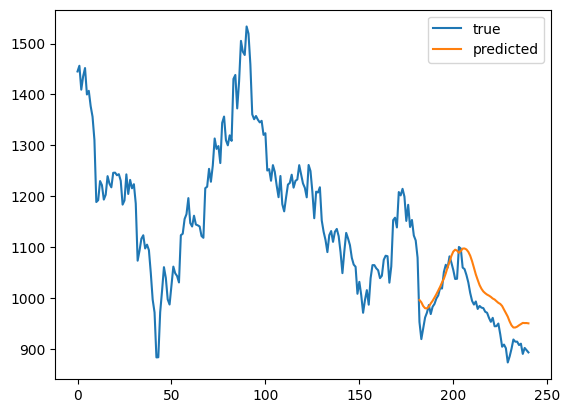

stock_results:      stock name：  Actual price  Predicted price     open       date  Test RMSE
3013   赣锋锂业.xlsx        953.75       996.828003   932.09 2023-01-03  45.395977
3014   赣锋锂业.xlsx        920.12       992.310547   945.54 2023-01-04  45.395977
3015   赣锋锂业.xlsx        941.91       984.937317   927.92 2023-01-05  45.395977
3016   赣锋锂业.xlsx        962.49       980.618713   940.43 2023-01-06  45.395977
3017   赣锋锂业.xlsx        972.17       980.501831   966.39 2023-01-09  45.395977
3018   赣锋锂业.xlsx        986.97       983.618774   967.06 2023-01-10  45.395977
3019   赣锋锂业.xlsx        969.22       990.081787   981.32 2023-01-11  45.395977
3020   赣锋锂业.xlsx        983.61       995.241638   979.17 2023-01-12  45.395977
3021   赣锋锂业.xlsx        989.12      1001.553345   987.10 2023-01-13  45.395977
3022   赣锋锂业.xlsx        999.75      1008.134521   988.31 2023-01-16  45.395977
3023   赣锋锂业.xlsx       1005.80      1015.409424  1002.03 2023-01-17  45.395977
3024   赣锋锂业.xlsx       1020.60      1

<ipython-input-24-253513799d93>:59: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: -0.007372 using {'batch_size': 64, 'dropout': 0, 'epochs': 100, 'num_layers': 2, 'num_nodes': 64, 'time_steps': 30}
2/2 [==============================] - 0s 16ms/step
Train RMSE: 7.462239356956845
Test RMSE: 7.287256165430447


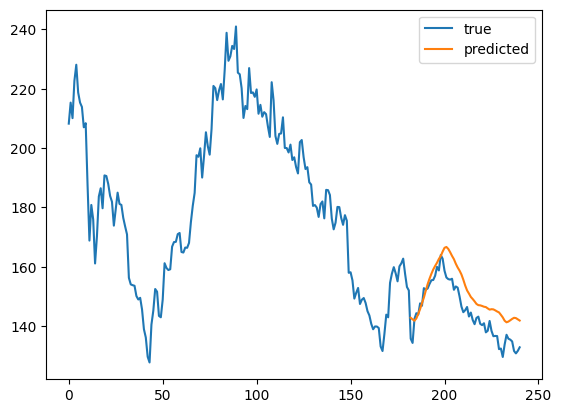

stock_results:      stock name：  Actual price  Predicted price    open       date  Test RMSE
1929   华友钴业.xlsx        135.73       142.792358  134.35 2023-01-03   7.287256
1930   华友钴业.xlsx        134.31       142.255692  135.27 2023-01-04   7.287256
1931   华友钴业.xlsx        142.45       141.798065  137.57 2023-01-05   7.287256
1932   华友钴业.xlsx        144.33       142.581512  140.08 2023-01-06   7.287256
1933   华友钴业.xlsx        143.85       144.092834  146.14 2023-01-09   7.287256
1934   华友钴业.xlsx        147.66       145.723770  143.51 2023-01-10   7.287256
1935   华友钴业.xlsx        146.84       147.739883  146.96 2023-01-11   7.287256
1936   华友钴业.xlsx        152.78       149.569702  148.29 2023-01-12   7.287256
1937   华友钴业.xlsx        152.30       151.901718  153.36 2023-01-13   7.287256
1938   华友钴业.xlsx        152.66       154.094116  152.28 2023-01-16   7.287256
1939   华友钴业.xlsx        154.18       155.951569  153.27 2023-01-17   7.287256
1940   华友钴业.xlsx        155.44       157.601746  

<ipython-input-24-253513799d93>:59: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: -0.009900 using {'batch_size': 64, 'dropout': 0.1, 'epochs': 100, 'num_layers': 1, 'num_nodes': 64, 'time_steps': 30}
2/2 [==============================] - 0s 11ms/step
Train RMSE: 5.9278679150481945
Test RMSE: 4.187858971789744


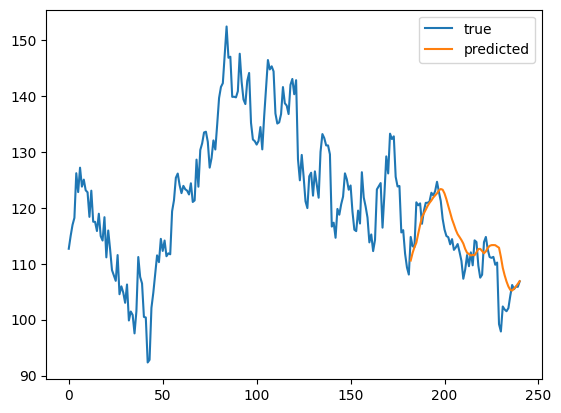

stock_results:      stock name：  Actual price  Predicted price    open       date  Test RMSE
3013   晶澳科技.xlsx        114.78       110.559669  111.95 2023-01-03   4.187859
3014   晶澳科技.xlsx        113.12       111.925140  115.34 2023-01-04   4.187859
3015   晶澳科技.xlsx        112.96       112.954285  112.69 2023-01-05   4.187859
3016   晶澳科技.xlsx        120.97       113.740379  116.44 2023-01-06   4.187859
3017   晶澳科技.xlsx        120.43       115.374794  121.12 2023-01-09   4.187859
3018   晶澳科技.xlsx        120.78       116.913055  120.72 2023-01-10   4.187859
3019   晶澳科技.xlsx        117.13       118.314827  119.03 2023-01-11   4.187859
3020   晶澳科技.xlsx        119.42       118.986115  117.22 2023-01-12   4.187859
3021   晶澳科技.xlsx        120.87       119.647705  121.10 2023-01-13   4.187859
3022   晶澳科技.xlsx        120.89       120.322578  120.76 2023-01-16   4.187859
3023   晶澳科技.xlsx        121.10       120.864220  122.59 2023-01-17   4.187859
3024   晶澳科技.xlsx        122.68       121.295898  

<ipython-input-24-253513799d93>:59: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: -0.006544 using {'batch_size': 128, 'dropout': 0, 'epochs': 100, 'num_layers': 1, 'num_nodes': 64, 'time_steps': 30}
2/2 [==============================] - 0s 14ms/step
Train RMSE: 29.972004316574115
Test RMSE: 16.87108882074538


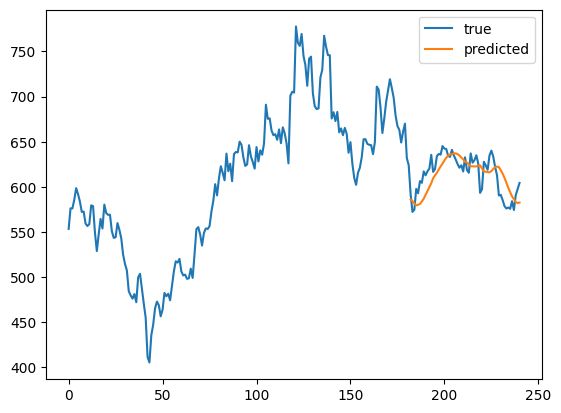

stock_results:      stock name：  Actual price  Predicted price    open       date  Test RMSE
2591   晶盛机电.xlsx        592.29       585.981384  588.87 2023-01-03  16.871089
2592   晶盛机电.xlsx        572.21       584.326538  584.98 2023-01-04  16.871089
2593   晶盛机电.xlsx        574.61       581.520081  573.87 2023-01-05  16.871089
2594   晶盛机电.xlsx        597.75       579.417480  574.43 2023-01-06  16.871089
2595   晶盛机电.xlsx        592.85       580.131592  598.03 2023-01-09  16.871089
2596   晶盛机电.xlsx        606.36       581.060913  596.36 2023-01-10  16.871089
2597   晶盛机电.xlsx        604.42       583.834595  602.47 2023-01-11  16.871089
2598   晶盛机电.xlsx        617.10       586.819458  602.01 2023-01-12  16.871089
2599   晶盛机电.xlsx        612.75       591.258301  617.10 2023-01-13  16.871089
2600   晶盛机电.xlsx        617.28       595.327271  613.95 2023-01-16  16.871089
2601   晶盛机电.xlsx        620.15       599.653992  613.02 2023-01-17  16.871089
2602   晶盛机电.xlsx        635.42       603.959656  

<ipython-input-24-253513799d93>:59: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Best: -0.004937 using {'batch_size': 64, 'dropout': 0, 'epochs': 100, 'num_layers': 1, 'num_nodes': 64, 'time_steps': 30}
2/2 [==============================] - 0s 13ms/step
Train RMSE: 0.8178791337190865
Test RMSE: 0.5773170112096855


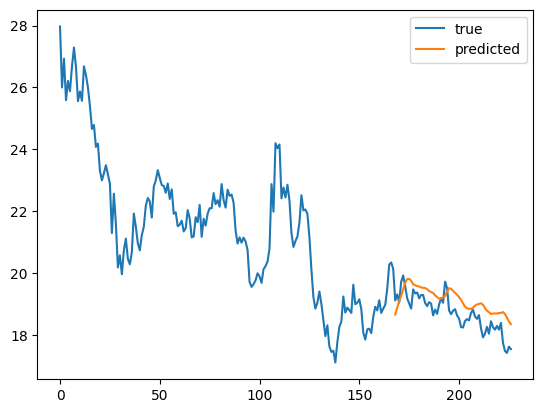

stock_results:     stock name：  Actual price  Predicted price   open       date  Test RMSE
228   龙源电力.xlsx         19.12        18.668280  18.34 2023-01-03   0.577317
229   龙源电力.xlsx         19.32        18.882812  19.17 2023-01-04   0.577317
230   龙源电力.xlsx         19.05        19.110828  20.11 2023-01-05   0.577317
231   龙源电力.xlsx         19.73        19.267023  19.02 2023-01-06   0.577317
232   龙源电力.xlsx         19.93        19.480238  19.73 2023-01-09   0.577317
233   龙源电力.xlsx         19.58        19.692701  19.96 2023-01-10   0.577317
234   龙源电力.xlsx         19.19        19.812584  19.66 2023-01-11   0.577317
235   龙源电力.xlsx         19.02        19.820951  19.13 2023-01-12   0.577317
236   龙源电力.xlsx         18.86        19.757006  19.03 2023-01-13   0.577317
237   龙源电力.xlsx         19.48        19.641872  18.82 2023-01-16   0.577317
238   龙源电力.xlsx         19.35        19.615339  19.44 2023-01-17   0.577317
239   龙源电力.xlsx         19.38        19.587420  19.41 2023-01-18   0.5773

<ipython-input-24-253513799d93>:59: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: -0.004574 using {'batch_size': 64, 'dropout': 0.1, 'epochs': 100, 'num_layers': 2, 'num_nodes': 64, 'time_steps': 30}
2/2 [==============================] - 0s 22ms/step
Train RMSE: 0.14692568349330204
Test RMSE: 0.09740663944542768


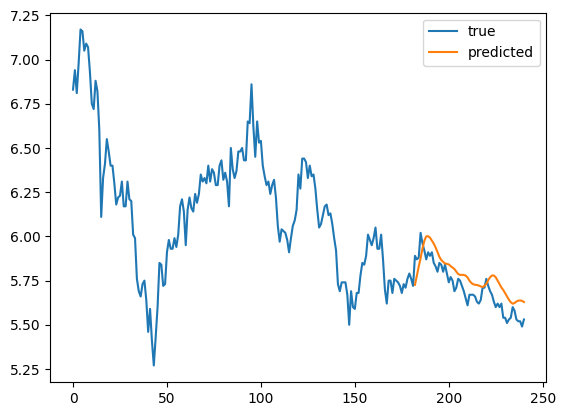

stock_results:     stock name：  Actual price  Predicted price  open       date  Test RMSE
381   三峡能源.xlsx          5.89         5.726335  5.70 2023-01-03   0.097407
382   三峡能源.xlsx          5.87         5.777010  5.87 2023-01-04   0.097407
383   三峡能源.xlsx          5.88         5.829341  5.88 2023-01-05   0.097407
384   三峡能源.xlsx          6.02         5.876550  5.89 2023-01-06   0.097407
385   三峡能源.xlsx          5.96         5.931603  6.02 2023-01-09   0.097407
386   三峡能源.xlsx          5.92         5.975450  5.95 2023-01-10   0.097407
387   三峡能源.xlsx          5.87         5.999925  5.93 2023-01-11   0.097407
388   三峡能源.xlsx          5.91         6.001218  5.87 2023-01-12   0.097407
389   三峡能源.xlsx          5.89         5.992671  5.93 2023-01-13   0.097407
390   三峡能源.xlsx          5.91         5.976041  5.89 2023-01-16   0.097407
391   三峡能源.xlsx          5.85         5.959284  5.90 2023-01-17   0.097407
392   三峡能源.xlsx          5.83         5.936841  5.85 2023-01-18   0.097407
393   三峡能源

<ipython-input-24-253513799d93>:59: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: -0.007308 using {'batch_size': 64, 'dropout': 0, 'epochs': 100, 'num_layers': 1, 'num_nodes': 64, 'time_steps': 30}
2/2 [==============================] - 0s 15ms/step
Train RMSE: 19.080783922631266
Test RMSE: 11.804539114317565


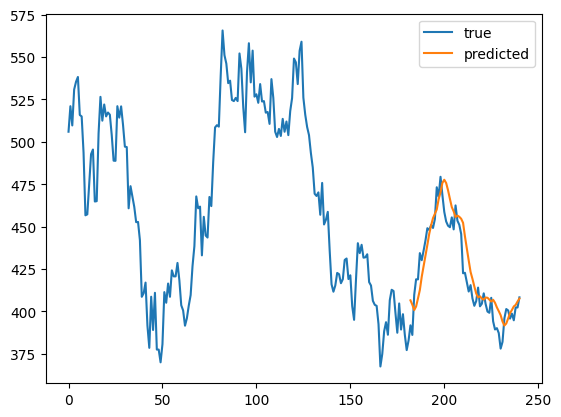

stock_results:      stock name：  Actual price  Predicted price    open       date  Test RMSE
1110   宁德时代.xlsx        391.75       406.492065  394.12 2023-01-03  11.804539
1111   宁德时代.xlsx        386.09       403.932526  388.59 2023-01-04  11.804539
1112   宁德时代.xlsx        409.71       400.733032  390.10 2023-01-05  11.804539
1113   宁德时代.xlsx        418.91       402.858704  408.20 2023-01-06  11.804539
1114   宁德时代.xlsx        418.85       407.619965  425.17 2023-01-09  11.804539
1115   宁德时代.xlsx        434.34       412.594971  419.92 2023-01-10  11.804539
1116   宁德时代.xlsx        430.17       420.378540  432.83 2023-01-11  11.804539
1117   宁德时代.xlsx        435.85       426.664948  434.34 2023-01-12  11.804539
1118   宁德时代.xlsx        441.88       432.934601  446.40 2023-01-13  11.804539
1119   宁德时代.xlsx        449.05       439.235413  440.87 2023-01-16  11.804539
1120   宁德时代.xlsx        448.02       445.796356  449.35 2023-01-17  11.804539
1121   宁德时代.xlsx        450.93       450.799896  

<ipython-input-24-253513799d93>:59: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)


Best: -0.008251 using {'batch_size': 128, 'dropout': 0.1, 'epochs': 100, 'num_layers': 1, 'num_nodes': 32, 'time_steps': 30}
2/2 [==============================] - 0s 12ms/step
Train RMSE: 46.8515439484835
Test RMSE: 47.32598222441526


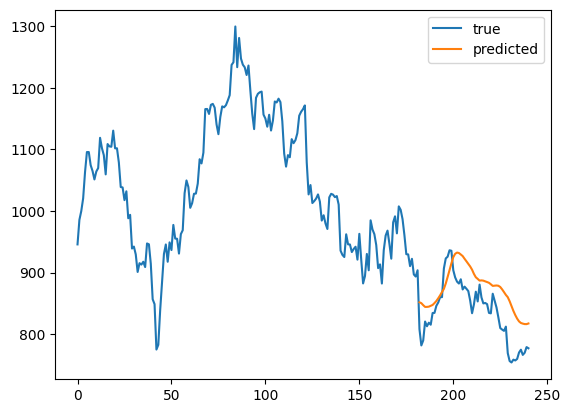

stock_results:      stock name：  Actual price  Predicted price    open       date  Test RMSE
2611   隆基绿能.xlsx        808.09       851.608337  808.67 2023-01-03  47.325982
2612   隆基绿能.xlsx        781.56       850.240417  809.82 2023-01-04  47.325982
2613   隆基绿能.xlsx        789.64       846.953613  785.98 2023-01-05  47.325982
2614   隆基绿能.xlsx        820.40       844.125854  791.17 2023-01-06  47.325982
2615   隆基绿能.xlsx        812.71       844.157288  824.82 2023-01-09  47.325982
2616   隆基绿能.xlsx        818.48       844.579590  824.44 2023-01-10  47.325982
2617   隆基绿能.xlsx        815.21       845.928284  825.97 2023-01-11  47.325982
2618   隆基绿能.xlsx        834.24       847.336853  818.86 2023-01-12  47.325982
2619   隆基绿能.xlsx        834.43       850.392944  850.78 2023-01-13  47.325982
2620   隆基绿能.xlsx        845.97       853.795959  834.43 2023-01-16  47.325982
2621   隆基绿能.xlsx        851.35       858.171570  847.89 2023-01-17  47.325982
2622   隆基绿能.xlsx        860.01       862.989990  

<ipython-input-24-253513799d93>:59: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: -0.006552 using {'batch_size': 64, 'dropout': 0, 'epochs': 100, 'num_layers': 1, 'num_nodes': 32, 'time_steps': 30}
2/2 [==============================] - 0s 12ms/step
Train RMSE: 34.21749151598811
Test RMSE: 20.02777315737496


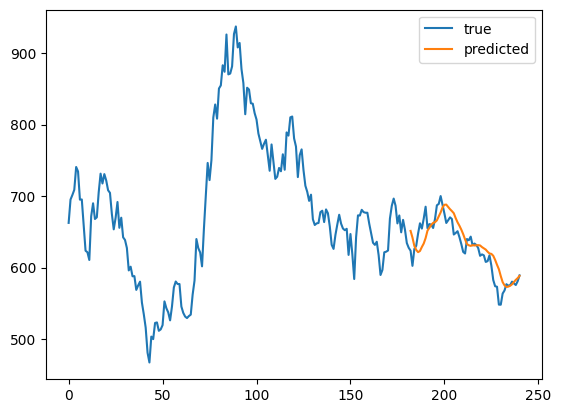

stock_results:      stock name：  Actual price  Predicted price    open       date  Test RMSE
2177   天赐材料.xlsx        623.64       651.294678  612.12 2023-01-03  20.027773
2178   天赐材料.xlsx        602.44       642.028198  619.00 2023-01-04  20.027773
2179   天赐材料.xlsx        626.02       630.348450  604.40 2023-01-05  20.027773
2180   天赐材料.xlsx        630.52       624.693298  620.13 2023-01-06  20.027773
2181   天赐材料.xlsx        647.64       621.595154  635.01 2023-01-09  20.027773
2182   天赐材料.xlsx        661.97       623.259033  643.01 2023-01-10  20.027773
2183   天赐材料.xlsx        654.52       628.797913  662.11 2023-01-11  20.027773
2184   天赐材料.xlsx        668.56       633.681274  653.82 2023-01-12  20.027773
2185   天赐材料.xlsx        685.13       641.296021  675.30 2023-01-13  20.027773
2186   天赐材料.xlsx        655.09       651.663269  671.79 2023-01-16  20.027773
2187   天赐材料.xlsx        660.84       655.685608  652.84 2023-01-17  20.027773
2188   天赐材料.xlsx        660.00       659.769653  

<ipython-input-24-253513799d93>:59: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: -0.009459 using {'batch_size': 64, 'dropout': 0.1, 'epochs': 100, 'num_layers': 1, 'num_nodes': 64, 'time_steps': 30}
2/2 [==============================] - 0s 11ms/step
Train RMSE: 3.7433651635748797
Test RMSE: 2.1688662581121085


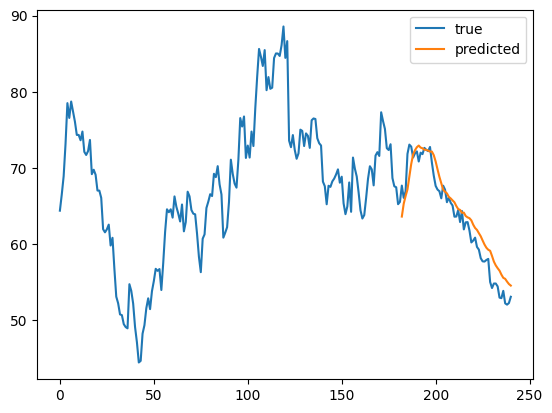

stock_results:     stock name：  Actual price  Predicted price   open       date  Test RMSE
624   天合光能.xlsx         67.69        63.625759  64.86 2023-01-03   2.168866
625   天合光能.xlsx         66.08        65.309486  67.99 2023-01-04   2.168866
626   天合光能.xlsx         66.94        66.311516  65.86 2023-01-05   2.168866
627   天合光能.xlsx         71.85        67.185860  69.28 2023-01-06   2.168866
628   天合光能.xlsx         73.07        68.873032  72.34 2023-01-09   2.168866
629   天合光能.xlsx         72.80        70.529404  73.68 2023-01-10   2.168866
630   天合光能.xlsx         71.37        71.775490  72.94 2023-01-11   2.168866
631   天合光能.xlsx         71.91        72.336998  72.38 2023-01-12   2.168866
632   天合光能.xlsx         72.18        72.726295  71.97 2023-01-13   2.168866
633   天合光能.xlsx         70.85        72.943306  72.14 2023-01-16   2.168866
634   天合光能.xlsx         72.01        72.676147  71.56 2023-01-17   2.168866
635   天合光能.xlsx         71.82        72.584770  72.18 2023-01-18   2.1688

<ipython-input-24-253513799d93>:59: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: -0.005220 using {'batch_size': 64, 'dropout': 0, 'epochs': 100, 'num_layers': 1, 'num_nodes': 64, 'time_steps': 30}
2/2 [==============================] - 0s 13ms/step
Train RMSE: 43.36139615980157
Test RMSE: 24.237222590538515


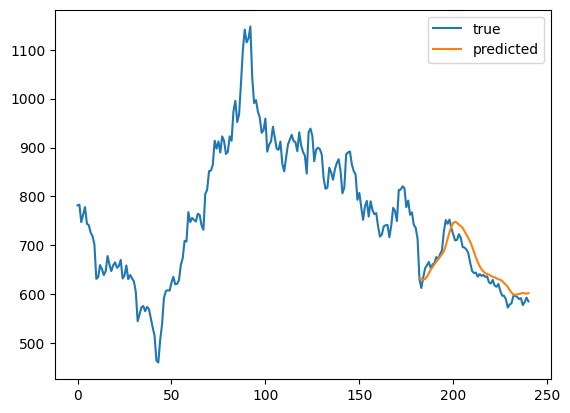

stock_results:      stock name：  Actual price  Predicted price    open       date  Test RMSE
2998   天齐锂业.xlsx        630.84       632.837830  609.28 2023-01-03  24.237223
2999   天齐锂业.xlsx        612.92       632.374451  626.49 2023-01-04  24.237223
3000   天齐锂业.xlsx        634.17       630.041748  618.04 2023-01-05  24.237223
3001   天齐锂业.xlsx        653.24       631.248901  628.04 2023-01-06  24.237223
3002   天齐锂业.xlsx        659.21       636.128479  662.63 2023-01-09  24.237223
3003   天齐锂业.xlsx        666.27       642.669006  657.97 2023-01-10  24.237223
3004   天齐锂业.xlsx        653.55       650.449585  664.87 2023-01-11  24.237223
3005   天齐锂业.xlsx        661.07       655.901367  662.16 2023-01-12  24.237223
3006   天齐锂业.xlsx        664.02       661.411255  666.50 2023-01-13  24.237223
3007   天齐锂业.xlsx        676.27       666.404663  664.64 2023-01-16  24.237223
3008   天齐锂业.xlsx        671.77       672.379944  682.01 2023-01-17  24.237223
3009   天齐锂业.xlsx        682.24       676.914124  

<ipython-input-24-253513799d93>:59: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: -0.004886 using {'batch_size': 64, 'dropout': 0, 'epochs': 100, 'num_layers': 2, 'num_nodes': 64, 'time_steps': 30}
2/2 [==============================] - 0s 16ms/step
Train RMSE: 21.338305134556585
Test RMSE: 12.328442385645777


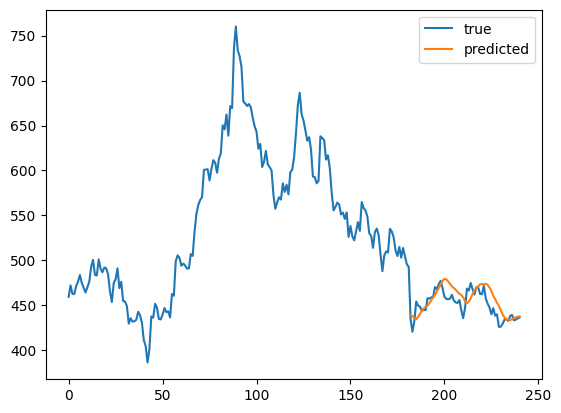

stock_results:      stock name：  Actual price  Predicted price    open       date  Test RMSE
4583   通威股份.xlsx        434.42       438.955597  432.51 2023-01-03  12.328442
4584   通威股份.xlsx        420.73       438.311371  434.42 2023-01-04  12.328442
4585   通威股份.xlsx        432.51       435.703918  420.84 2023-01-05  12.328442
4586   通威股份.xlsx        454.39       434.457184  432.51 2023-01-06  12.328442
4587   通威股份.xlsx        449.79       437.206238  454.39 2023-01-09  12.328442
4588   通威股份.xlsx        448.56       440.746185  451.25 2023-01-10  12.328442
4589   通威股份.xlsx        443.96       444.213043  450.35 2023-01-11  12.328442
4590   通威股份.xlsx        445.08       446.595428  443.85 2023-01-12  12.328442
4591   通威股份.xlsx        444.74       448.403900  445.30 2023-01-13  12.328442
4592   通威股份.xlsx        457.98       449.662048  444.18 2023-01-16  12.328442
4593   通威股份.xlsx        457.42       452.544098  461.68 2023-01-17  12.328442
4594   通威股份.xlsx        458.88       455.661682  

<ipython-input-24-253513799d93>:59: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: -0.008743 using {'batch_size': 64, 'dropout': 0, 'epochs': 100, 'num_layers': 2, 'num_nodes': 64, 'time_steps': 30}
2/2 [==============================] - 0s 20ms/step
Train RMSE: 6.489057394930518
Test RMSE: 4.513536709632217


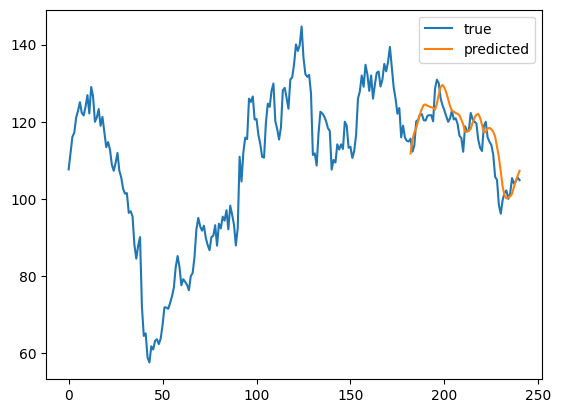

stock_results:      stock name：  Actual price  Predicted price    open       date  Test RMSE
2716   阳光电源.xlsx        115.61       111.770844  110.01 2023-01-03   4.513537
2717   阳光电源.xlsx        112.25       115.326576  114.99 2023-01-04   4.513537
2718   阳光电源.xlsx        113.91       117.232628  111.63 2023-01-05   4.513537
2719   阳光电源.xlsx        120.10       118.352356  114.00 2023-01-06   4.513537
2720   阳光电源.xlsx        120.50       120.208832  120.96 2023-01-09   4.513537
2721   阳光电源.xlsx        121.92       121.880531  121.70 2023-01-10   4.513537
2722   阳光电源.xlsx        121.96       123.368912  121.87 2023-01-11   4.513537
2723   阳光电源.xlsx        120.39       124.363251  121.96 2023-01-12   4.513537
2724   阳光电源.xlsx        120.32       124.479897  121.56 2023-01-13   4.513537
2725   阳光电源.xlsx        121.58       124.140099  120.20 2023-01-16   4.513537
2726   阳光电源.xlsx        121.70       123.923790  121.61 2023-01-17   4.513537
2727   阳光电源.xlsx        121.70       123.755859  

<ipython-input-24-253513799d93>:59: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: -0.007282 using {'batch_size': 64, 'dropout': 0, 'epochs': 100, 'num_layers': 2, 'num_nodes': 64, 'time_steps': 30}
2/2 [==============================] - 0s 17ms/step
Train RMSE: 92.14895096277675
Test RMSE: 53.14847957857628


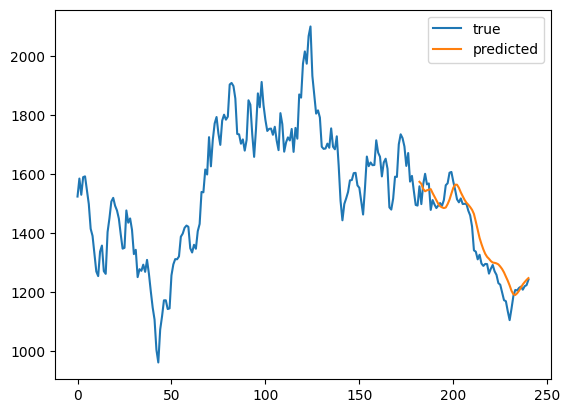

stock_results:      stock name：  Actual price  Predicted price     open       date  Test RMSE
3204   亿纬锂能.xlsx       1559.56      1574.766113  1565.62 2023-01-03   53.14848
3205   亿纬锂能.xlsx       1499.11      1567.868286  1533.88 2023-01-04   53.14848
3206   亿纬锂能.xlsx       1566.87      1550.395874  1520.15 2023-01-05   53.14848
3207   亿纬锂能.xlsx       1601.99      1542.710571  1551.18 2023-01-06   53.14848
3208   亿纬锂能.xlsx       1565.97      1546.143677  1604.84 2023-01-09   53.14848
3209   亿纬锂能.xlsx       1569.18      1548.087402  1560.63 2023-01-10   53.14848
3210   亿纬锂能.xlsx       1479.50      1549.954712  1553.85 2023-01-11   53.14848
3211   亿纬锂能.xlsx       1512.84      1536.605347  1523.90 2023-01-12   53.14848
3212   亿纬锂能.xlsx       1497.69      1524.572754  1524.25 2023-01-13   53.14848
3213   亿纬锂能.xlsx       1485.74      1512.398071  1476.29 2023-01-16   53.14848
3214   亿纬锂能.xlsx       1493.94      1500.432251  1488.24 2023-01-17   53.14848
3215   亿纬锂能.xlsx       1502.68      1

<ipython-input-24-253513799d93>:59: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: -0.007877 using {'batch_size': 64, 'dropout': 0.1, 'epochs': 100, 'num_layers': 1, 'num_nodes': 64, 'time_steps': 30}
2/2 [==============================] - 0s 11ms/step
Train RMSE: 0.04194507199919769
Test RMSE: 0.037153671150441644


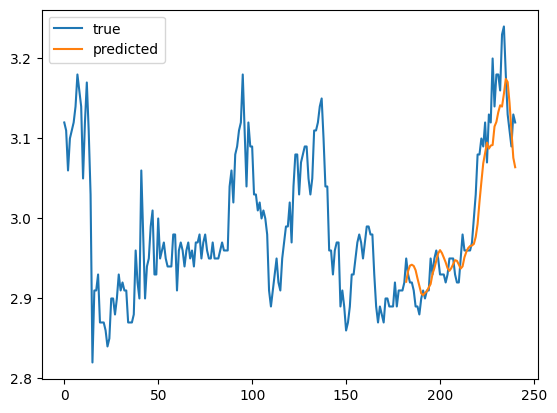

stock_results:     stock name：  Actual price  Predicted price  open       date  Test RMSE
814   中国广核.xlsx          2.95         2.920959  2.93 2023-01-03   0.037154
815   中国广核.xlsx          2.93         2.934283  2.96 2023-01-04   0.037154
816   中国广核.xlsx          2.92         2.941072  2.95 2023-01-05   0.037154
817   中国广核.xlsx          2.92         2.942189  2.93 2023-01-06   0.037154
818   中国广核.xlsx          2.91         2.940613  2.92 2023-01-09   0.037154
819   中国广核.xlsx          2.89         2.935337  2.91 2023-01-10   0.037154
820   中国广核.xlsx          2.89         2.925108  2.89 2023-01-11   0.037154
821   中国广核.xlsx          2.88         2.915748  2.89 2023-01-12   0.037154
822   中国广核.xlsx          2.90         2.906348  2.89 2023-01-13   0.037154
823   中国广核.xlsx          2.91         2.904119  2.90 2023-01-16   0.037154
824   中国广核.xlsx          2.90         2.906982  2.91 2023-01-17   0.037154
825   中国广核.xlsx          2.91         2.909162  2.90 2023-01-18   0.037154
826   中国广核

<ipython-input-24-253513799d93>:59: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: -0.007876 using {'batch_size': 64, 'dropout': 0.1, 'epochs': 100, 'num_layers': 1, 'num_nodes': 32, 'time_steps': 30}
2/2 [==============================] - 0s 22ms/step
Train RMSE: 0.22695231524996268
Test RMSE: 0.14640235058384268


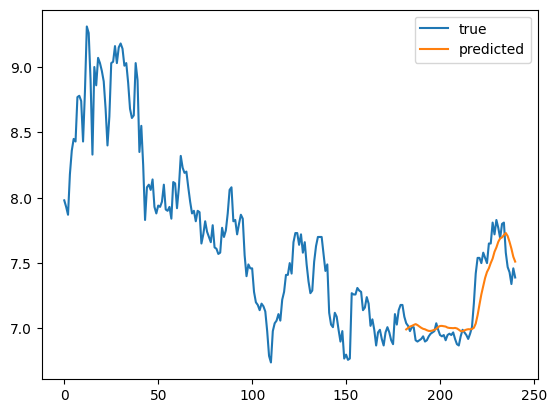

stock_results:      stock name：  Actual price  Predicted price  open       date  Test RMSE
1842   中国核电.xlsx          7.04         6.993052  6.95 2023-01-03   0.146402
1843   中国核电.xlsx          7.02         7.003953  7.03 2023-01-04   0.146402
1844   中国核电.xlsx          6.98         7.014459  7.02 2023-01-05   0.146402
1845   中国核电.xlsx          7.01         7.019625  6.99 2023-01-06   0.146402
1846   中国核电.xlsx          7.01         7.026992  7.02 2023-01-09   0.146402
1847   中国核电.xlsx          6.91         7.033404  6.99 2023-01-10   0.146402
1848   中国核电.xlsx          6.90         7.026006  6.94 2023-01-11   0.146402
1849   中国核电.xlsx          6.91         7.015216  6.89 2023-01-12   0.146402
1850   中国核电.xlsx          6.92         7.005250  6.91 2023-01-13   0.146402
1851   中国核电.xlsx          6.94         6.997474  6.91 2023-01-16   0.146402
1852   中国核电.xlsx          6.90         6.993688  6.94 2023-01-17   0.146402
1853   中国核电.xlsx          6.91         6.986581  6.89 2023-01-18   0.1464

KeyError: ignored

In [24]:
# load data and predict stock price
results = []
for filename in os.listdir(input_dir):
    if filename.endswith('.xlsx'):
        print('Processing file:', filename)
        # read dataset
        df = pd.read_excel(os.path.join(input_dir, filename), skipfooter=2)

        # select train and test dataset
        date_line = '2022-11-21' # 30days
        # date_line = '2022-10-10' # 60days
        # date_line = '2022-11-07 # 40days

        train = df[(df['日期'] >= '2022-01-04') & (df['日期'] < date_line)] 
        test = df[(df['日期'] >= date_line) & (df['日期'] <= '2023-03-31')] 
        print("TRAIN长度：",len(train))
        print("TEST长度：",len(test))

        # data normalization
        scaler = MinMaxScaler(feature_range=(0, 1))
        train_data = scaler.fit_transform(train["收盘价(元)"].values.reshape(-1, 1))
        test_data = scaler.transform(test["收盘价(元)"].values.reshape(-1, 1))

        # transform data format
        time_step=30 # 20, 60
        x_train, y_train = create_dataset(train_data, time_step)
        x_test, y_test = create_dataset(test_data, time_step)
        print("XTRAIN长度：",len(x_train),"YTRAIN长度：",len(y_train))
        print("XTEST长度：",len(x_test),"YTEST长度：",len(y_test))

        # transform to LSTM input format
        x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
        x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))                                   

        # plot the loss curve
        # plt.plot(history.history['loss'])
        # plt.plot(history.history['val_loss'])
        # plt.title('Loss Curve')
        # plt.ylabel('Loss')
        # plt.xlabel('Epoch')
        # plt.legend(['Train', 'Validation'], loc='upper right')
        # plt.show()

        # hyperparameter optimization
        model = KerasRegressor(build_fn=create_model, verbose=0)
        param_grid = dict(batch_size=batch_size, time_steps=time_steps, num_layers=num_layers, num_nodes=num_nodes, epochs=epochs, dropout=dropout)
        grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
        grid_result = grid.fit(x_train, y_train)
        print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

        # get the best model
        best_model = grid.best_estimator_.model

        # predict stock price
        train_predict = best_model.predict(x_train)
        test_predict = best_model.predict(x_test)

        # rescaling predicted results to the range of original data
        train_predict = scaler.inverse_transform(train_predict.reshape(-1,1))
        y_train = scaler.inverse_transform(y_train.reshape(-1,1))
        test_predict = scaler.inverse_transform(test_predict)
        y_test = scaler.inverse_transform(y_test.reshape(-1,1))

        # calculate RMSE
        train_rmse = np.sqrt(np.mean(np.power((y_train - train_predict), 2)))
        test_rmse = np.sqrt(np.mean(np.power((y_test - test_predict), 2)))
        print('Train RMSE:', train_rmse)
        print('Test RMSE:', test_rmse)

        
        # Plot the true values of the overall data
        plt.plot(np.concatenate([y_train[:,0], y_test[:,0]]), label='true')
        # Plot the predicted values of the test data
        plt.plot(np.arange(len(x_train), len(x_train)+len(x_test)), test_predict[:,0], label='predicted')
        
        plt.legend()
        plt.show()

        # Store the results in a DataFrame
        stock_results = pd.DataFrame({
            "stock name：":np.array([filename]*len(y_test)),
            'Actual price': y_test.flatten(),
            'Predicted price': test_predict.flatten(),
            "open": df[(df['日期'] >= '2023-01-01') & (df['日期'] <= '2023-03-31')]["开盘价(元)"],
            "date": df[(df['日期'] >= '2023-01-01') & (df['日期'] <= '2023-03-31')]["日期"]
        })
        
        # Calculate the RMSE of the training and test sets
        stock_results['Test RMSE'] = test_rmse

        print("stock_results:",stock_results)

        # Save the results to an xlsx file (one file for each stock)
        output_filename = filename.split('.')[0] + '_results1_1day.xlsx'
        stock_results.to_excel(os.path.join(output_dir, output_filename), index=False)

        # Add the results to the results list
        # results.append(stock_results)

# Merge all the results into one DataFrame
# all_results = pd.concat(results, axis=1)

# Save the results to a csv file (one file for all stocks)
# all_results.to_excel(output_file, index=False)